In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../LocalTracker")

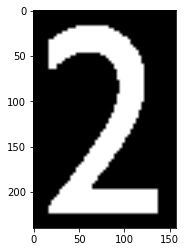

In [5]:
img = cv.imread("sample.png",0)
plt.imshow(img, cmap="gray")

In [6]:
from mosse import MosseFilter

In [7]:
filter = MosseFilter()

In [8]:
h, w = img.shape
bbox = ((0,0),(w-1,h-1))

In [9]:
ret = filter.update(img, bbox)

In [10]:
print(ret)

False


## Initialise

In [11]:
filter.initialise(img, bbox)

True

## Predict

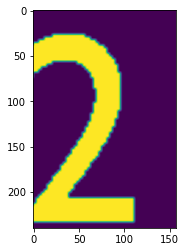

(True, ((-28.0, 10.0), (132.0, 250.0)))

In [12]:
center = ((w)/2, (h)/2)
window = cv.getRectSubPix(img, (w,h), center)
translate_transform = np.array([[1., 0, -25.3], [0., 1., 10.]])
transformed_win = cv.warpAffine(window, M=translate_transform, dsize=(int(w), int(h)))
plt.imshow(transformed_win)
plt.show()
filter.predict(transformed_win, bbox)

In [13]:
H = filter.H
G = filter.G

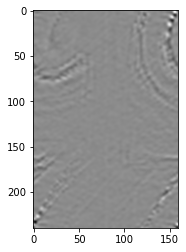

In [14]:
filter_h = np.real(np.fft.ifft2(H))
plt.imshow(filter_h, cmap="gray")

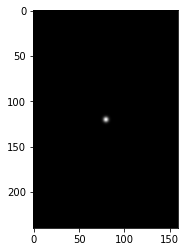

In [15]:
g = np.real(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")

## Update

In [16]:
filter.update(transformed_win, bbox)

True

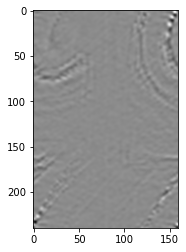

In [17]:
filter_h = np.real(np.fft.ifft2(H))
plt.imshow(filter_h, cmap="gray")